In [1]:
import sys
sys.path.append("../")

from utility.reaction_rate_calc import *
from utility.plotting import *
from utility.animations import *

PATH = "../data/"
SAVE_PATH = "../plots/"

energy_kelvin = 3700
animator = Animator(PATH, "coriolis_0_0", SAVE_PATH, "coriolis_0_0")

saved animation as ../plots//coriolis_0_0_distance_animation.gif
saved animation as ../plots//coriolis_0_0_angular_animation.gif
saved animation as ../plots//coriolis_0_0_omega_animation.gif


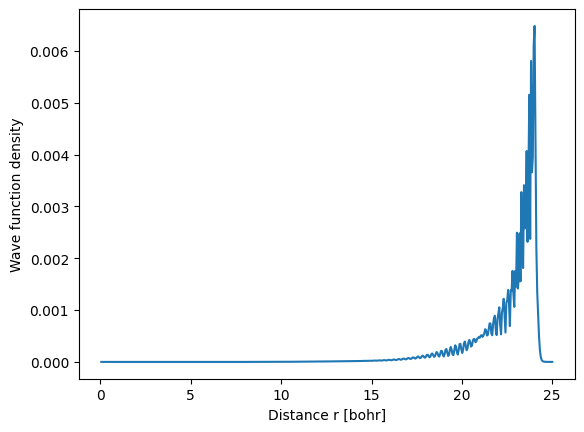

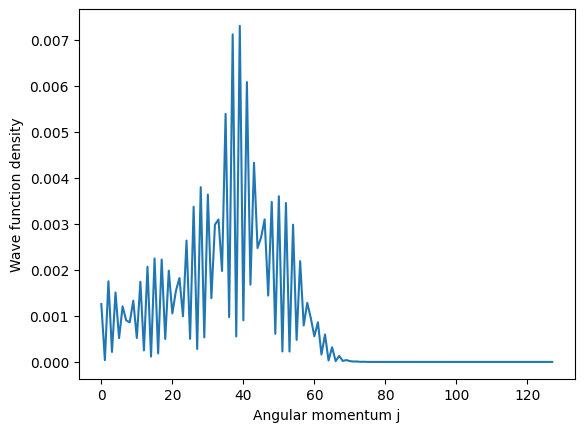

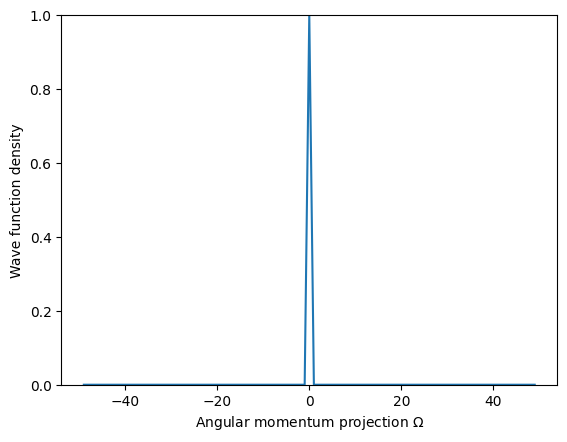

In [ ]:
animator.file_prefix = "coriolis_0_0"
animator.save_prefix = "coriolis_0_0"

animator.distance_animation()
animator.angular_animation()
animator.omega_animation()

saved animation as ../plots//coriolis_1_0_distance_animation.gif
saved animation as ../plots//coriolis_1_0_angular_animation.gif
saved animation as ../plots//coriolis_1_0_omega_animation.gif


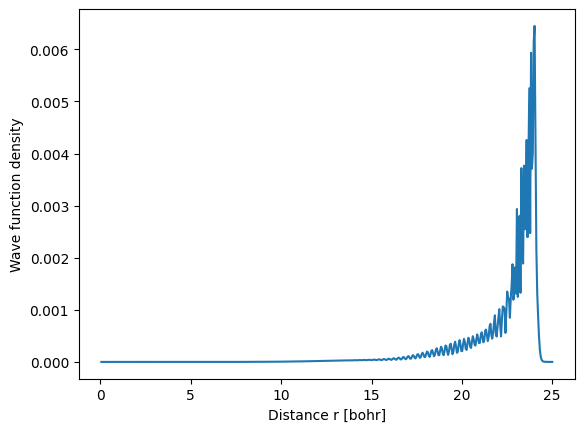

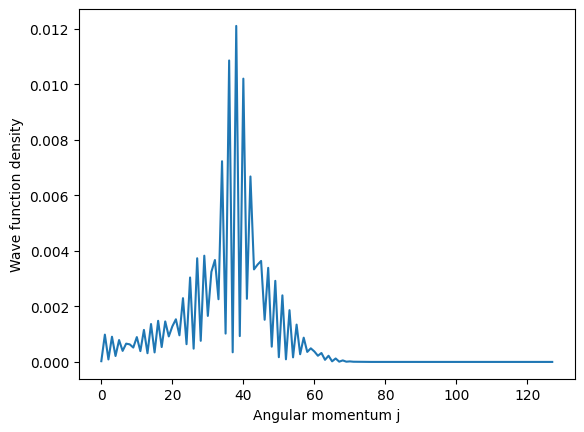

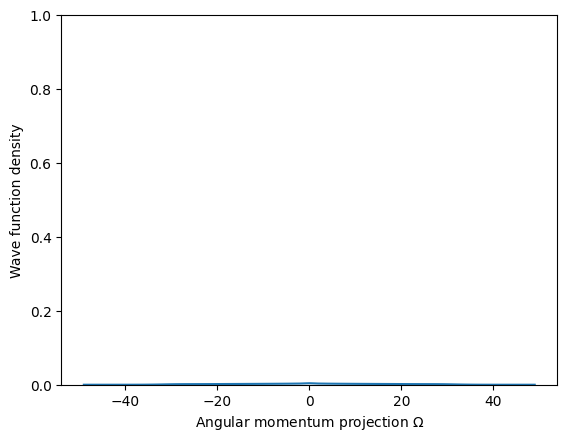

In [3]:
animator.file_prefix = "coriolis_1_0"
animator.save_prefix = "coriolis_1_0"

animator.distance_animation()
animator.angular_animation()
animator.omega_animation()

saved animation as ../plots//coriolis_1_1_distance_animation.gif
saved animation as ../plots//coriolis_1_1_angular_animation.gif
saved animation as ../plots//coriolis_1_1_omega_animation.gif


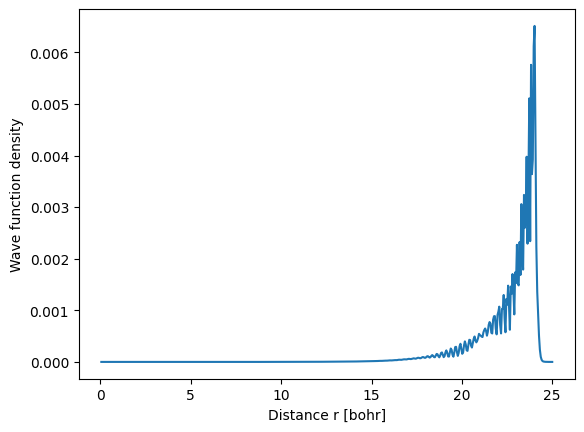

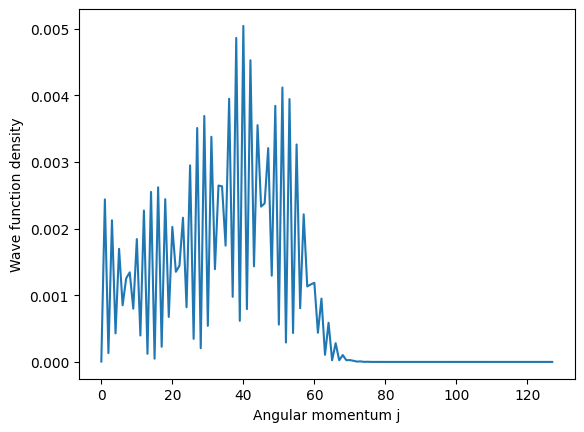

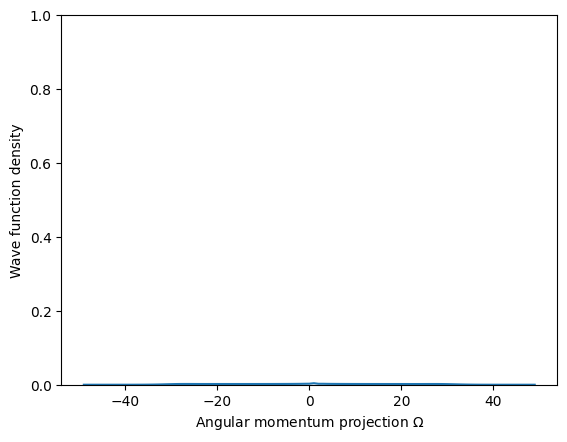

In [4]:
animator.file_prefix = "coriolis_1_1"
animator.save_prefix = "coriolis_1_1"

animator.distance_animation()
animator.angular_animation()
animator.omega_animation()

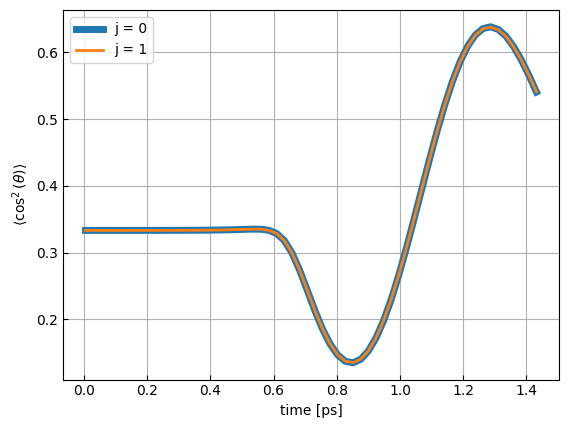

In [4]:
alignments = AlignmentPlot(PATH)

fig, ax = alignments.plot_series(
    alignments.single_j("coriolis", 0),
    alignments.single_j("coriolis", 1)
)
ax.lines[0].set_linewidth(5)
ax.lines[1].set_linewidth(2)
ax.legend(["j = 0", "j = 1"]);

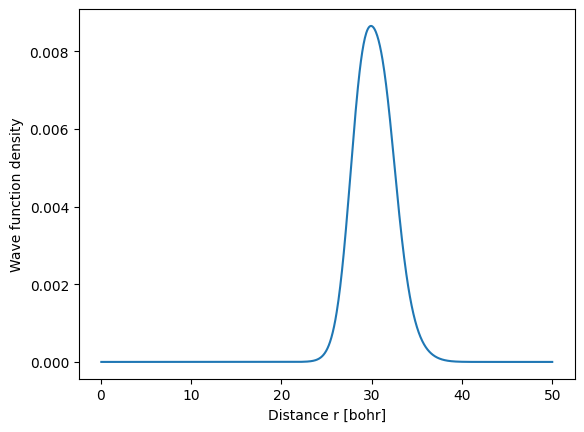

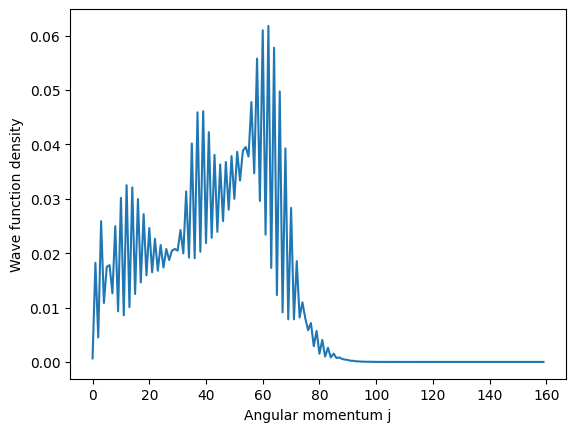

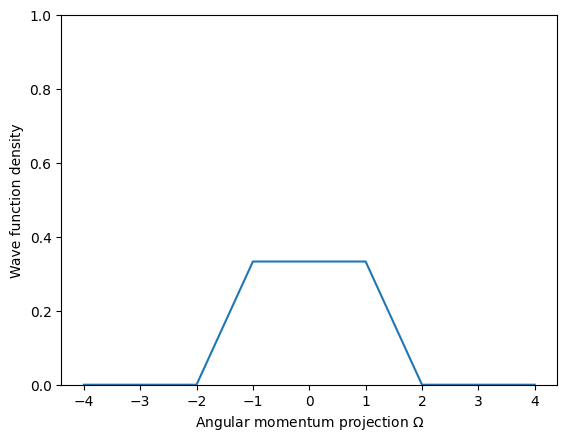

In [8]:
animator.file_prefix = "coriolis_1_phase_0_0"
animator.save_prefix = "coriolis_1_phase_0_0"

animator.distance_animation()
animator.angular_animation()
animator.omega_animation()

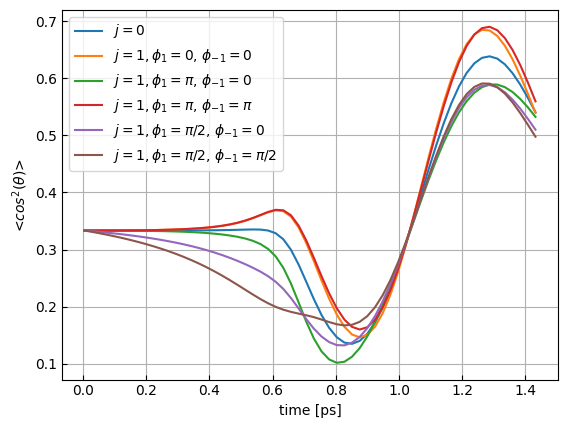

In [ ]:
fig, ax = alignments.plot_series(
    alignments.single("coriolis_0_0"),
    alignments.single_j("coriolis", 1),
    alignments.single("coriolis_1_phase_0_0"),
    alignments.single("coriolis_1_phase_pi_0"),
    alignments.single("coriolis_1_phase_pi_pi"),
    alignments.single("coriolis_1_phase_hpi_0"),
    alignments.single("coriolis_1_phase_hpi_hpi")
)

ax.legend([
    "j = 0",
    "j = 1",
    r"j = 1, $\phi_1 = 0, \phi_{-1} = 0$",
    r"j = 1, $\phi_1 = \pi, \phi_{-1} = 0$",
    r"j = 1, $\phi_1 = \pi, \phi_{-1} = \pi$",
    r"j = 1, $\phi_1 = \pi/2, \phi_{-1} = 0$",
    r"j = 1, $\phi_1 = \pi/2, \phi_{-1} = \pi/2$",
])
fig.lines[0].set_linewidth(4) # type: ignore

fig.savefig(f"{SAVE_PATH}/coriolis_phases.pdf");

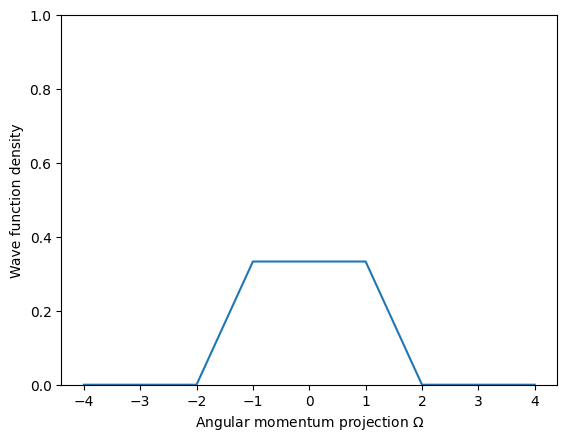

In [10]:
animator.file_prefix = "coriolis_1_phase_hpi_hpi"
animator.save_prefix = "coriolis_1_phase"

animator.omega_animation()

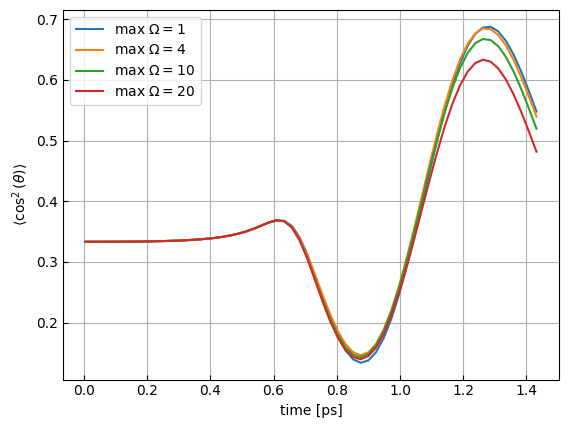

In [6]:
omega_maxes = (1, 4, 10, 20)

alignments.plot_series(
    *(alignments.single(f"coriolis_1_phase_coriolis_omega_max_{omega_max}") 
        for omega_max in omega_maxes)
)
ax.legend([fr"max $\Omega = {omega_max}$" for omega_max in omega_maxes])

fig.savefig(f"{SAVE_PATH}/coriolis_phases_convergence.pdf");

saved animation as ../plots//free_coriolis_distance_animation.gif
saved animation as ../plots//free_coriolis_angular_animation.gif
saved animation as ../plots//free_coriolis_polar_animation.gif
saved animation as ../plots//free_coriolis_omega_animation.gif


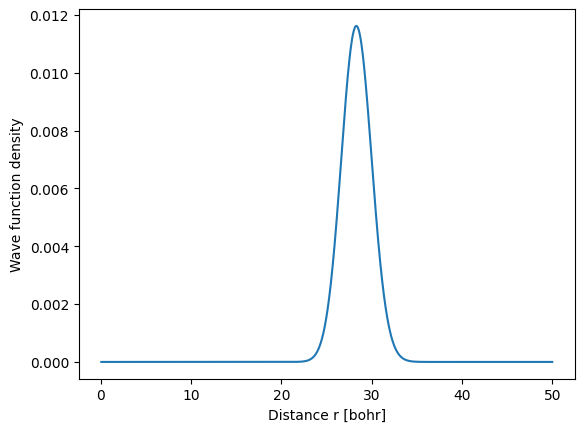

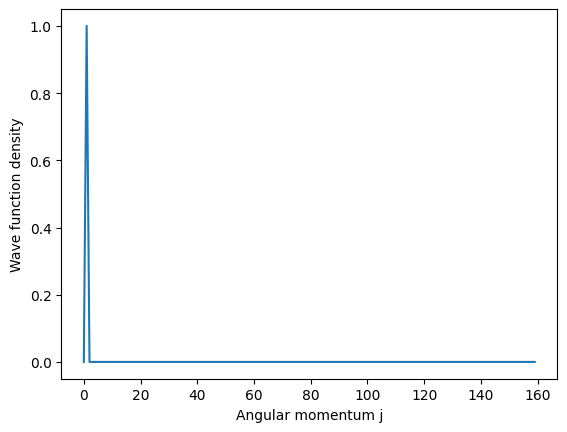

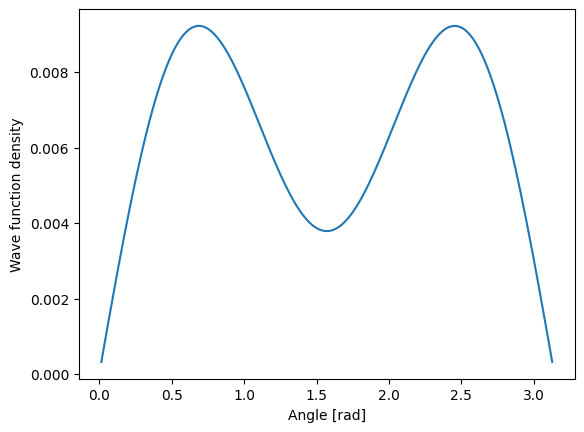

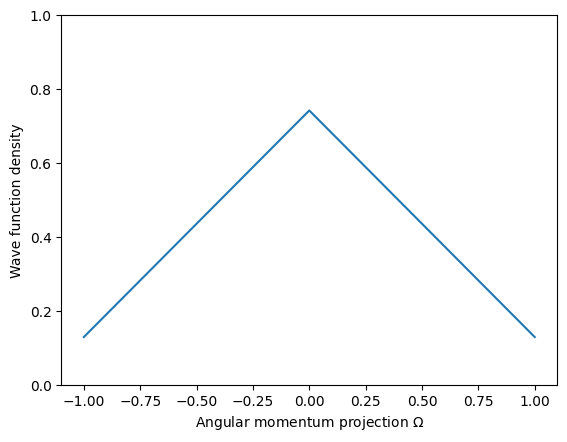

In [2]:
animator = Animator(PATH, "free_coriolis", SAVE_PATH, "free_coriolis")

animator.distance_animation()
animator.angular_animation()
animator.polar_animation()
animator.omega_animation()

In [2]:
from utility.reaction_rate_calc import *
from utility.propagation import SpinOne

PATH = "../data/"
SAVE_PATH = "../plots/"
omega_max = 8

In [3]:
j_init = 0
omega_init = 0

losses = Losses(PATH, f"coriolis_losses_omega_max_{omega_max}_{j_init}_{omega_init}.dat", j_init, omega_init)
pi_reaction_0 = losses.get_reaction(Ionization.Penning)
di_reaction_0 = losses.get_reaction(Ionization.Dissociative)

print(f"Penning reaction rate: {pi_reaction_0.reaction_rate:.4}")
print(f"Dissociative reaction rate: {di_reaction_0.reaction_rate:.4}")

Penning reaction rate: 1.018e-10
Dissociative reaction rate: 2.2e-10


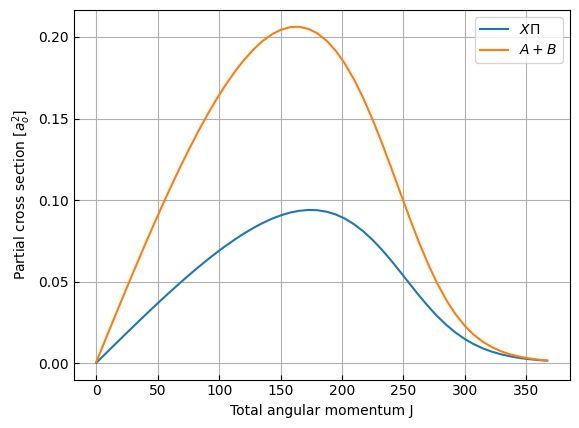

In [4]:
fig, ax = plot()

ax.plot(losses.j_tot_values, pi_reaction_0.partial_cross_sections, label = r"$X \Pi$")
ax.plot(losses.j_tot_values, di_reaction_0.partial_cross_sections, label = "$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend();

In [5]:
j_init = 1
omega_init = SpinOne(1/3, 0, 1/3, 0)

losses = Losses(PATH, f"coriolis_losses_omega_max_{omega_max}_{j_init}_{omega_init}.dat", j_init, None)
pi_reaction_1 = losses.get_reaction(Ionization.Penning)
di_reaction_1 = losses.get_reaction(Ionization.Dissociative)

print(f"Penning reaction rate: {pi_reaction_1.reaction_rate:.4}")
print(f"Dissociative reaction rate: {di_reaction_1.reaction_rate:.4}")

Penning reaction rate: 1.066e-10
Dissociative reaction rate: 2.47e-10


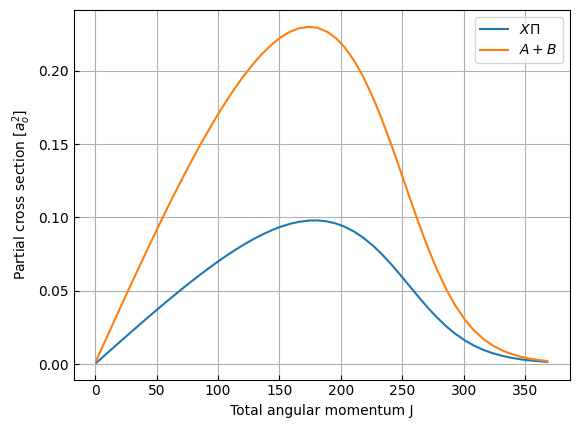

In [6]:
fig, ax = plot()

ax.plot(losses.j_tot_values, pi_reaction_1.partial_cross_sections, label = r"$X \Pi$")
ax.plot(losses.j_tot_values, di_reaction_1.partial_cross_sections, label = "$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend();

In [7]:
pi_rate_0 = pi_reaction_0.reaction_rate
pi_rate_1 = pi_reaction_1.reaction_rate

di_rate_0 = di_reaction_0.reaction_rate
di_rate_1 = di_reaction_1.reaction_rate

print(f"Total reaction rate for j=0:")
print(f"Penning ionization: {pi_rate_0:.4}")
print(f"Dissociative ionization: {di_rate_0:.4}")
print()
print(f"Total reaction rate for j=1:")
print(f"Penning ionization: {pi_rate_1:.4}")
print(f"Dissociative ionization: {di_rate_1:.4}")
print()
print(f"Ratios j=1 to j=0:")
print(f"Penning ionization: {pi_rate_1/pi_rate_0}")
print(f"Dissociative ionization: {di_rate_1/di_rate_0}")

Total reaction rate for j=0:
Penning ionization: 1.018e-10
Dissociative ionization: 2.2e-10

Total reaction rate for j=1:
Penning ionization: 1.066e-10
Dissociative ionization: 2.47e-10

Ratios j=1 to j=0:
Penning ionization: 1.0472114690560317
Dissociative ionization: 1.122336480229891


In [8]:
j_init = 1
omega_init = 0

losses = Losses(PATH, f"coriolis_losses_omega_max_{omega_max}_{j_init}_{omega_init}.dat", j_init, omega_init)
pi_reaction_1_0 = losses.get_reaction(Ionization.Penning)
di_reaction_1_0 = losses.get_reaction(Ionization.Dissociative)

print(f"Penning reaction rate: {pi_reaction_1_0.reaction_rate:.4}")
print(f"Dissociative reaction rate: {di_reaction_1_0.reaction_rate:.4}")

Penning reaction rate: 3.026e-11
Dissociative reaction rate: 8.186e-11


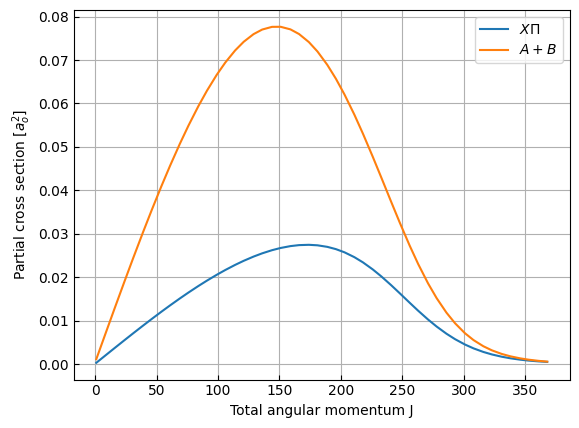

In [9]:
fig, ax = plot()

ax.plot(losses.j_tot_values, pi_reaction_1_0.partial_cross_sections, label = r"$X \Pi$")
ax.plot(losses.j_tot_values, di_reaction_1_0.partial_cross_sections, label = "$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend();

In [10]:
j_init = 1
omega_init = 1

losses = Losses(PATH, f"coriolis_losses_omega_max_{omega_max}_{j_init}_{omega_init}.dat", j_init, omega_init)
pi_reaction_1_1 = losses.get_reaction(Ionization.Penning)
di_reaction_1_1 = losses.get_reaction(Ionization.Dissociative)

print(f"Penning reaction rate: {pi_reaction_1_1.reaction_rate:.4}")
print(f"Dissociative reaction rate: {di_reaction_1_1.reaction_rate:.4}")

Penning reaction rate: 7.155e-11
Dissociative reaction rate: 1.382e-10


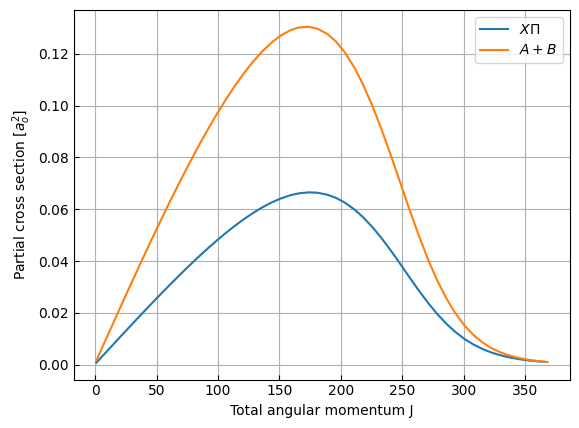

In [11]:
fig, ax = plot()

ax.plot(losses.j_tot_values, pi_reaction_1_1.partial_cross_sections, label = r"$X \Pi$")
ax.plot(losses.j_tot_values, di_reaction_1_1.partial_cross_sections, label = "$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend();

In [12]:
pi_rate_0 = pi_reaction_0.reaction_rate
pi_rate_1 = pi_reaction_1_0.reaction_rate + pi_reaction_1_1.reaction_rate

di_rate_0 = di_reaction_0.reaction_rate
di_rate_1 = di_reaction_1_0.reaction_rate + di_reaction_1_1.reaction_rate

print(f"Total reaction rate for j=0:")
print(f"Penning ionization: {pi_rate_0:.4}")
print(f"Dissociative ionization: {di_rate_0:.4}")
print()
print(f"Total reaction rate for j=1:")
print(f"Penning ionization: {pi_rate_1:.4}")
print(f"Dissociative ionization: {di_rate_1:.4}")
print()
print(f"Ratios j=1 to j=0:")
print(f"Penning ionization: {pi_rate_1/pi_rate_0}")
print(f"Dissociative ionization: {di_rate_1/di_rate_0}")

Total reaction rate for j=0:
Penning ionization: 1.018e-10
Dissociative ionization: 2.2e-10

Total reaction rate for j=1:
Penning ionization: 1.018e-10
Dissociative ionization: 2.2e-10

Ratios j=1 to j=0:
Penning ionization: 1.0000881839882028
Dissociative ionization: 1.0000392139267944


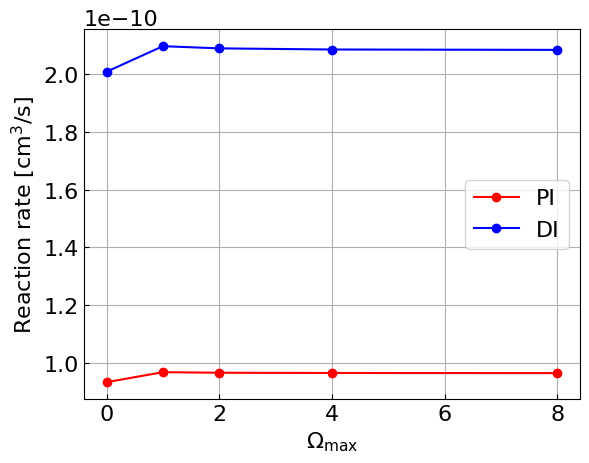

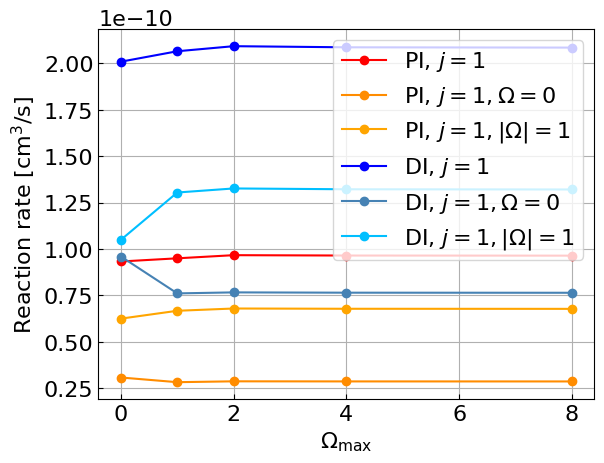

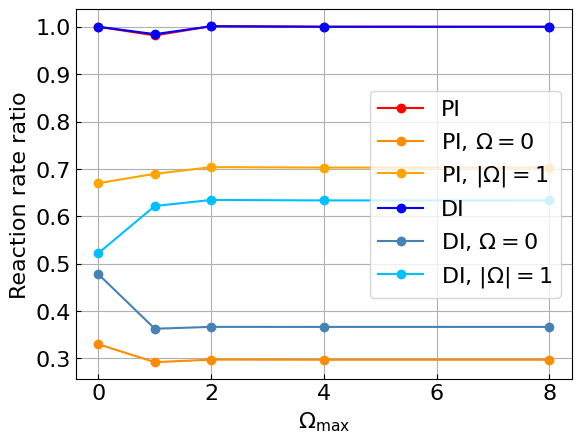

In [3]:
omega_maxes = np.array([0, 1, 2, 4, 8])

dependencies = ReactionDependence(omega_maxes, PATH, Ionization.Penning, unchanged_value = 0)

fig, ax = dependencies.plot_j_0(lambda e: f"coriolis_losses_omega_max_{e}_0_0.dat")
dependencies.ionization_type = Ionization.Dissociative
fig, ax = dependencies.plot_j_0(lambda e: f"coriolis_losses_omega_max_{e}_0_0.dat", (fig, ax))
ax.set_xlabel(r"$\Omega_\text{max}$")
fig.savefig(f"{SAVE_PATH}/coriolis_rr_omega_maxes_0.pdf")

dependencies.ionization_type = Ionization.Penning
fig, ax = dependencies.plot_j_1(lambda e, j, omega: f"coriolis_losses_omega_max_{e}_{j}_{omega}.dat")
dependencies.ionization_type = Ionization.Dissociative
fig, ax = dependencies.plot_j_1(lambda e, j, omega: f"coriolis_losses_omega_max_{e}_{j}_{omega}.dat", (fig, ax))
ax.set_xlabel(r"$\Omega_\text{max}$")
ax.legend(loc = "upper right")
fig.savefig(f"{SAVE_PATH}/coriolis_rr_omega_maxes_1.pdf")

dependencies.ionization_type = Ionization.Penning
fig, ax = dependencies.plot_ratios(lambda e, j, omega: f"coriolis_losses_omega_max_{e}_{j}_{omega}.dat")
dependencies.ionization_type = Ionization.Dissociative
fig, ax = dependencies.plot_ratios(lambda e, j, omega: f"coriolis_losses_omega_max_{e}_{j}_{omega}.dat", (fig, ax))
ax.set_xlabel(r"$\Omega_\text{max}$")
fig.savefig(f"{SAVE_PATH}/coriolis_rr_omega_maxes_ratio.pdf")


Text(0.5, 0, '$\\Omega_\\text{max}$')

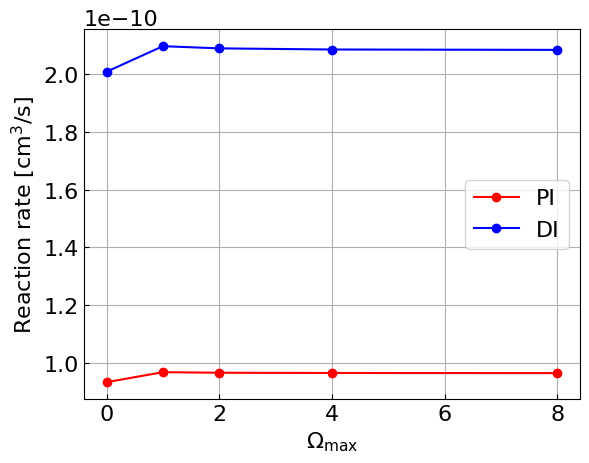

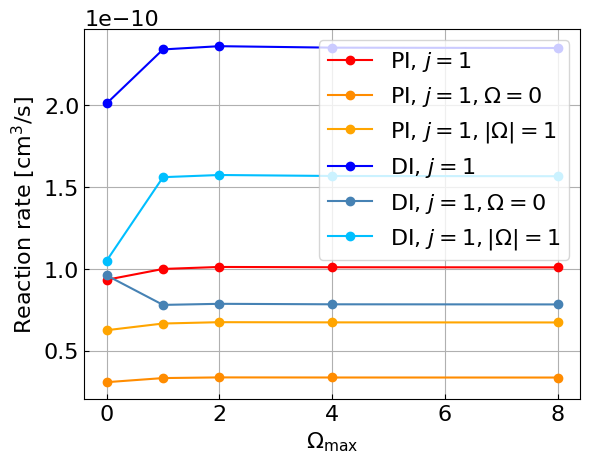

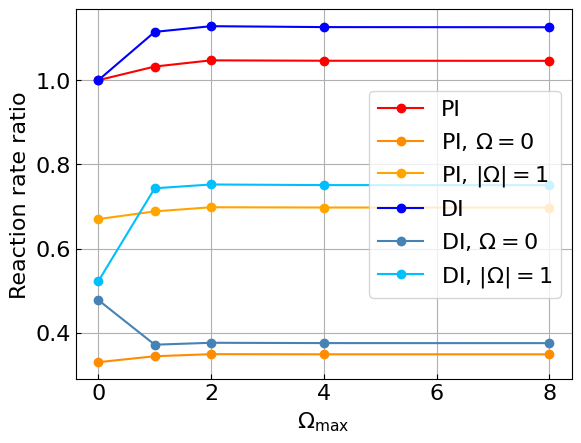

In [6]:
omega_init = SpinOne(1./3, 0., 1./3, 0.)
omega_maxes = np.array([0, 1, 2, 4, 8])

def file_name(e: float, j: int) -> str:
    if j == 0:
        return f"coriolis_losses_omega_max_{e}_{j}_0.dat"
    elif j == 1:
        return f"coriolis_losses_omega_max_{e}_{j}_{omega_init}.dat"
    else:
        raise NameError

dependencies = ReactionDependence(omega_maxes, PATH, Ionization.Penning, unchanged_value = 0)

fig, ax = dependencies.plot_j_0(lambda e: file_name(e, 0))
dependencies.ionization_type = Ionization.Dissociative
fig, ax = dependencies.plot_j_0(lambda e: f"coriolis_losses_omega_max_{e}_0_0.dat", (fig, ax))
ax.set_xlabel(r"$\Omega_\text{max}$")

dependencies.ionization_type = Ionization.Penning
fig, ax = dependencies.plot_j_1(lambda e, j, _: file_name(e, j))
dependencies.ionization_type = Ionization.Dissociative
fig, ax = dependencies.plot_j_1(lambda e, j, _: file_name(e, j), (fig, ax))
ax.set_xlabel(r"$\Omega_\text{max}$")
ax.legend(loc = "upper right")

dependencies.ionization_type = Ionization.Penning
fig, ax = dependencies.plot_ratios(lambda e, j, _: file_name(e, j))
dependencies.ionization_type = Ionization.Dissociative
fig, ax = dependencies.plot_ratios(lambda e, j, _: file_name(e, j), (fig, ax))
ax.set_xlabel(r"$\Omega_\text{max}$")


0.0 -> SpinOne(0.3,0.0,0.3,0.0)
1.0 -> SpinOne(0.3,0.0,0.3,1.6)
2.0 -> SpinOne(0.3,0.0,0.3,3.1)
3.0 -> SpinOne(0.3,0.0,0.3,4.7)
4.0 -> SpinOne(0.3,0.0,0.3,6.3)
5.0 -> SpinOne(0.3,1.6,0.3,1.6)
6.0 -> SpinOne(0.3,1.6,0.3,2.7)
7.0 -> SpinOne(0.3,1.6,0.3,3.9)
8.0 -> SpinOne(0.3,1.6,0.3,5.1)
9.0 -> SpinOne(0.3,1.6,0.3,6.3)
10.0 -> SpinOne(0.3,3.1,0.3,3.1)
11.0 -> SpinOne(0.3,3.1,0.3,3.9)
12.0 -> SpinOne(0.3,3.1,0.3,4.7)
13.0 -> SpinOne(0.3,3.1,0.3,5.5)
14.0 -> SpinOne(0.3,3.1,0.3,6.3)
15.0 -> SpinOne(0.3,4.7,0.3,4.7)
16.0 -> SpinOne(0.3,4.7,0.3,5.1)
17.0 -> SpinOne(0.3,4.7,0.3,5.5)
18.0 -> SpinOne(0.3,4.7,0.3,5.9)
19.0 -> SpinOne(0.3,4.7,0.3,6.3)


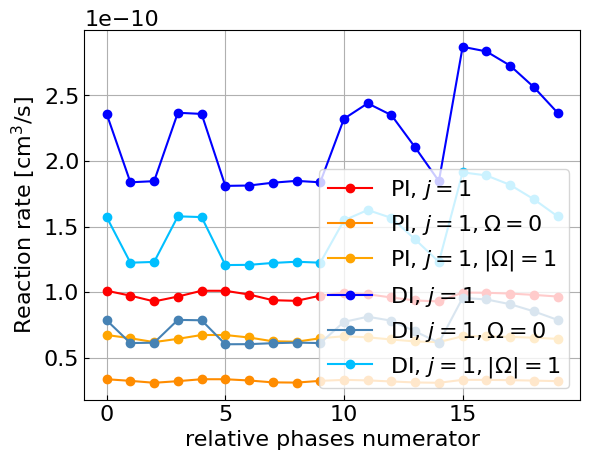

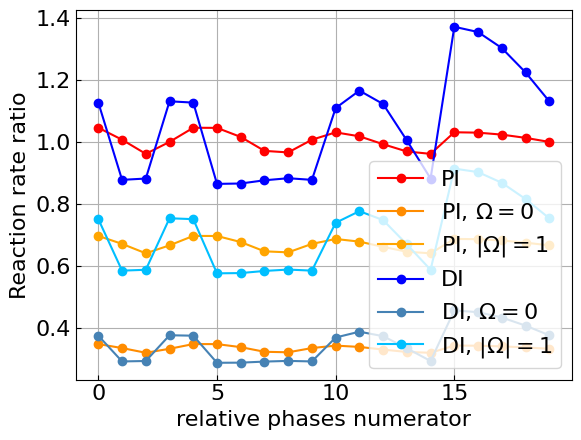

In [9]:
omega_inits = [SpinOne(1/3, angle1, 1/3, angle2) 
                for angle1 in np.linspace(0, 2 * np.pi, 5, dtype=float)
                    for angle2 in np.linspace(angle1, 2 * np.pi, 5, dtype=float)]
omega_inits = omega_inits[0:-5]

omega_numerator = [float(i) for i in range(len(omega_inits))]
for i in omega_numerator:
    print(f"{i} -> {omega_inits[int(i)]}")

# omega_numerator = [0., 2., 4., 8., 10., 14.]

dependencies = ReactionDependence(omega_numerator, PATH, Ionization.Penning)

def file_name(e: float, j: int) -> str:
    if j == 0:
        return f"coriolis_losses_omega_max_2_{j}_0.dat"
    elif j == 1:
        return f"coriolis_losses_omega_max_2_{j}_{omega_inits[int(e)]}.dat"
    else:
        raise NameError

dependencies.ionization_type = Ionization.Penning
fig, ax = dependencies.plot_j_1(lambda e, j, _: file_name(e, j))
dependencies.ionization_type = Ionization.Dissociative
fig, ax = dependencies.plot_j_1(lambda e, j, _: file_name(e, j), (fig, ax))
ax.set_xlabel(r"relative phases numerator")
ax.legend(loc = "lower right")
fig.savefig(f"{SAVE_PATH}/coriolis_reaction_rate_1_phases.pdf")

dependencies.ionization_type = Ionization.Penning
fig, ax = dependencies.plot_ratios(lambda e, j, _: file_name(e, j))
dependencies.ionization_type = Ionization.Dissociative
fig, ax = dependencies.plot_ratios(lambda e, j, _: file_name(e, j), (fig, ax))
ax.set_xlabel(r"relative phases numerator")
ax.legend(loc = "lower right")
fig.savefig(f"{SAVE_PATH}/coriolis_reaction_rate_ratios_phases.pdf")

0 -> SpinOne(0.3,0.0,0.3,0.0)
2 -> SpinOne(0.3,0.0,0.3,3.1)
4 -> SpinOne(0.3,0.0,0.3,6.3)
8 -> SpinOne(0.3,1.6,0.3,5.1)
10 -> SpinOne(0.3,3.1,0.3,3.1)
14 -> SpinOne(0.3,3.1,0.3,6.3)


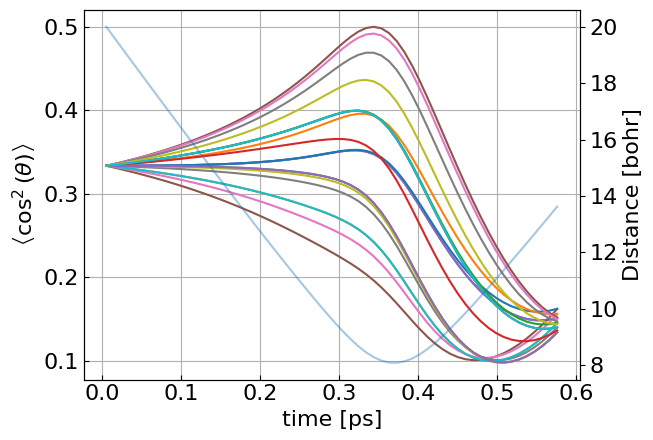

In [8]:
alignments = AlignmentPlot(PATH)

fig, ax = alignments.plot_series(*[
    alignments.single(f"coriolis_{omega_inits[int(e)]}")
        for e in omega_numerator # [0, 2, 4, 8, 10, 14]
    ])
ax2 = alignments.with_distance(f"coriolis_{omega_inits[int(omega_numerator[0])]}", (fig, ax))
fig.savefig(f"{SAVE_PATH}/alignments_coriolis_phases.pdf")

# ax.legend([0, 2, 4, 8, 10, 14])

for i in [0, 2, 4, 8, 10, 14]:
    print(f"{i} -> {omega_inits[int(i)]}")
